# Developer's Mindset Project

## Summary
The goal of this project is to find out what do the developers think with repect to education, development softwares and employee benefits. The data analysis is performed on the dataset provided by Stack Overflow. This data is basically taken from Stack Overflow's Developer survey conducted in the year 2017.

The project uses the required steps in the CRISP-DM process:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Results Evalluation
6. Model Deployment

## Business Understanding
There were so many questions as part of the survey. I was particularly interested to know the answers for the following questions:
1. What type of education did the developers pursue outside the formal education?
2. What are all the commonly preferred IDEs used by the developers according to the employment status?
3. What kind of employee benefits do the developers prefer?

In [125]:
#Import Statements used in the project
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

import qgrid
import ipywidgets as widgets

%matplotlib inline

## Data Understanding

In [126]:
# Data Understanding Read the datasets
survey_results_public_df = pd.read_csv("survey_results_public.csv")
survey_results_schema_df = pd.read_csv("survey_results_schema.csv")

In [127]:
# Check how the survey_results_public.csv data looks and also some stats about the dataset
print (survey_results_public_df.shape)
survey_results_public_df.head()

(51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# Check how the survey_results_public.csv data looks and also some stats about the dataset
print (survey_results_schema_df.shape)
survey_results_schema_df.head()

(154, 2)


,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [129]:
# Going through the data available in the survey_results_scheme.csv file to go through the survey questionnaire
survey_results_schema_qgrid_widget = qgrid.show_grid(survey_results_schema_df, column_options={ 'edible': False,'toolTip': "Not Editable" },show_toolbar=False)
survey_results_schema_qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# What type of education did the developers pursue outside the formal education?

In [130]:
#Checking the question of the question related to Education Important
list (survey_results_schema_df[survey_results_schema_df['Column']=='EducationTypes']['Question'])

['Outside of your formal schooling and education, which of the following have you done?']

In [131]:
#Get the value counts of different types of education
EducationTypes_data = survey_results_public_df['EducationTypes'].value_counts().reset_index()
EducationTypes_data.columns = ['education_type','count']
EducationTypes_data

,education_type,count
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276
...,...,...
442,Bootcamp; Industry certification; On-the-job t...,1
443,Bootcamp; Industry certification; On-the-job t...,1
444,Online course; Industry certification; On-the-...,1
445,Online course; Bootcamp; Industry certificatio...,1


## Data Preparation

In [132]:
# Checking whether data is missing on the column "education_type"
EducationTypes_data['education_type'].isnull().mean()==0

True

#### The above cell denotes that there are no missing values on the column "education_type" and hence we can proceed with the next steps of the analysis

In [133]:
# Function to get the possible options for those questionnaire that contains multi select check boxes

def get_possible_values(df,column_name):
    
    '''
    Function to get the possible options by looping through each row of data.
    
    ARGS:
    df: dataframe on which we need to loop through
    column_name : column that contains all the possible values
    
    OUTPUT:
    final_list: list of possible values
    
    '''
    
    # Code to get the list of options given for Eduation Type
    list_of_values=[]
    for index,row in df.iterrows():
        possible_values = row[column_name].split(';')
        list_of_values = list_of_values + possible_values

    #print (list_of_values)

    # Code to remove spaces in the above list
    pre_final_list=[]
    for x in range(len(list_of_values)):
        pre_final_list.append(list_of_values[x].strip())

    #print (pre_final_list)

    final_list = list(set(pre_final_list))

    #print (final_list)
    
    return final_list

In [134]:
#Get the possible values of Education Types
possible_values_education_types = get_possible_values(EducationTypes_data,'education_type')
possible_values_education_types

['Online course',
 'Industry certification',
 'Hackathon',
 'Open source contributions',
 'Self-taught',
 'Coding competition',
 'On-the-job training',
 'Part-time/evening course',
 'Bootcamp']

In [135]:
#To see how often each values appeared in users selection
def total_count(df, col1, col2, look_for):
    '''
    Function to get the total count of all the possible values
    
    ARGS:
    df - dataframe you want to look through
    col1 - column you want to look through
    col2 - column that you want to count values
    look_for - possible values

    OUTPUT:
    new_df - dataframe containing each possible value and the count of that value
    '''

    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [136]:
education_types_count_df = total_count(EducationTypes_data, 'education_type','count', possible_values_education_types)
education_types_count_df

,education_type,count
4,Self-taught,27330
0,Online course,13792
6,On-the-job training,12508
3,Open source contributions,11225
2,Hackathon,7150
5,Coding competition,6683
7,Part-time/evening course,4654
1,Industry certification,4472
8,Bootcamp,2727


In [137]:
#Let us see the percentage of people in each category
education_types_count_df['percentage'] = education_types_count_df['count']/education_types_count_df['count'].sum()
education_types_count_df

,education_type,count,percentage
4,Self-taught,27330,0.301852
0,Online course,13792,0.152329
6,On-the-job training,12508,0.138147
3,Open source contributions,11225,0.123977
2,Hackathon,7150,0.078970
5,Coding competition,6683,0.073812
7,Part-time/evening course,4654,0.051402
1,Industry certification,4472,0.049392
8,Bootcamp,2727,0.030119


#### In the above cell, we can see that the data is prepared for the analysis. We have the required column "percentage" for our analysis

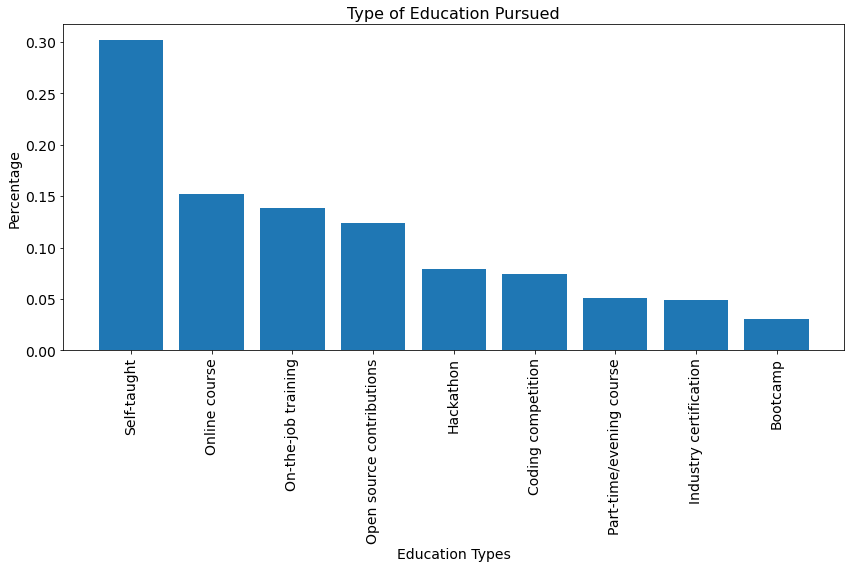

In [138]:
def bar_plot(df, col1, col2, label1,label2, title):
    '''
    Function to plot a bar chart
    
    ARGS:
    df: dataframe containing the survey dataset
    col1: x axis column
    col2: y axis column
    label1: x axis label
    label2: y axis label
    title: title of the plot
    
    OUTPUT:
    No Output
    
    '''

    fig = plt.figure(figsize = (14, 6))
    
    plt.bar(df[col1], df[col2])
        
    plt.title(title,fontsize=16)
    plt.xticks(rotation=90,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(label1,fontsize=14)
    plt.ylabel(label2,fontsize=14)
    
    plt.show()

    
bar_plot(education_types_count_df,'education_type','percentage','Education Types','Percentage','Type of Education Pursued')

## Conclusion

The data visualization is generated with the prepared data. From the above chart, we can see that Outside formal education, developers generally pursued studies on their own to gain more knowledge.

# What are all the commonly preferred IDEs used by the developers according to the employment status?

In [139]:
# Check the different types of Employment Status
survey_results_public_df['EmploymentStatus'].value_counts()

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

In [140]:
# Check the different types of IDE
survey_results_public_df['IDE'].value_counts()

Notepad++; Visual Studio                                                            1624
Visual Studio                                                                       1566
Vim                                                                                 1217
Sublime Text                                                                         992
Notepad++; Visual Studio; Visual Studio Code                                         878
                                                                                    ... 
Atom; Android Studio; Eclipse; NetBeans; Visual Studio; Visual Studio Code             1
Atom; Notepad++; Vim; IPython / Jupyter; Visual Studio                                 1
Atom; Sublime Text; Eclipse; IntelliJ; PHPStorm                                        1
Atom; Emacs; Notepad++; Sublime Text; Android Studio; Eclipse; PyCharm                 1
Notepad++; Eclipse; IPython / Jupyter; NetBeans; PyCharm; RStudio; Visual Studio       1
Name: IDE, Length: 47

## Data Preparation

We are using the following columns - EmploymentStatus and IDE. Let us see if either of the columns are having any missing values and prepare the data for the analysis

In [141]:
# Checking whether data is missing on the column "EmploymentStatus"
print (survey_results_public_df['EmploymentStatus'].isnull().mean()==0)

# Checking whether data is missing on the column "EmploymentStatus"
print (survey_results_public_df['IDE'].isnull().mean())

True
0.30280977584059776


#### From the above cell, we can see that around 30% data is not available for the column IDE. Since we are going to make an observational analysis, it is better to remove the missing values from the dataset.

In [142]:
# Removing all those rows on which IDE column is null
survey_results_public_df_without_missing_values = survey_results_public_df[~survey_results_public_df['IDE'].isnull()]

In [143]:
#Checking the shape of original data set as well as the modified dataset
print (survey_results_public_df.shape)
print (survey_results_public_df_without_missing_values.shape)

(51392, 154)
(35830, 154)


In [144]:
def get_IDE_details_based_on_employment_status(df, col_name, col_value, second_col_name):

    '''
    Function to get IDE details based on the Employment Status
    
    ARGS:
    df: dataframe containing the survey dataset
    col_name : column used for filtering the data
    col_value : data is fitered based on this col_value
    second_col_name: column that you want to count values
    
    OUTPUT:
    required_df[:10]: output dataframe containing the top 10 rows
    
    '''
    filtered_df = df[ df[col_name] == col_value]
    count_df = filtered_df[second_col_name].value_counts().reset_index()
    count_df.columns = [second_col_name,'count']

    possible_values = get_possible_values(count_df,second_col_name)

    required_df = total_count(count_df, second_col_name, 'count', possible_values)
    
    return required_df[:10]

In [145]:
#Use the modified dataframe for the analysis
survey_results_full_time_employee_df = get_IDE_details_based_on_employment_status(survey_results_public_df_without_missing_values, 'EmploymentStatus', 'Employed full-time', 'IDE')
survey_results_self_employed_df = get_IDE_details_based_on_employment_status(survey_results_public_df_without_missing_values, 'EmploymentStatus', 'Independent contractor, freelancer, or self-employed', 'IDE')
survey_results_part_time_employee_df = get_IDE_details_based_on_employment_status(survey_results_public_df_without_missing_values, 'EmploymentStatus', 'Employed part-time', 'IDE')

pre_merged_df = pd.merge(survey_results_full_time_employee_df,survey_results_self_employed_df,on='IDE',suffixes=('_full_time_employees','_self_employed'),how='inner')
merged_df = pd.merge(pre_merged_df,survey_results_part_time_employee_df,on='IDE',how='inner')
merged_df.columns = ['IDE','Full Time Employees','Self Employed','Part Time Employees']
merged_df


reshaped_df = pd.melt(merged_df, id_vars="IDE", var_name="Employment Type", value_name="Usage Count")

qgrid_widget_1 = qgrid.show_grid(reshaped_df)
display (qgrid_widget_1)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

#### We can see that the data is prepared for our analysis in the above cell. 

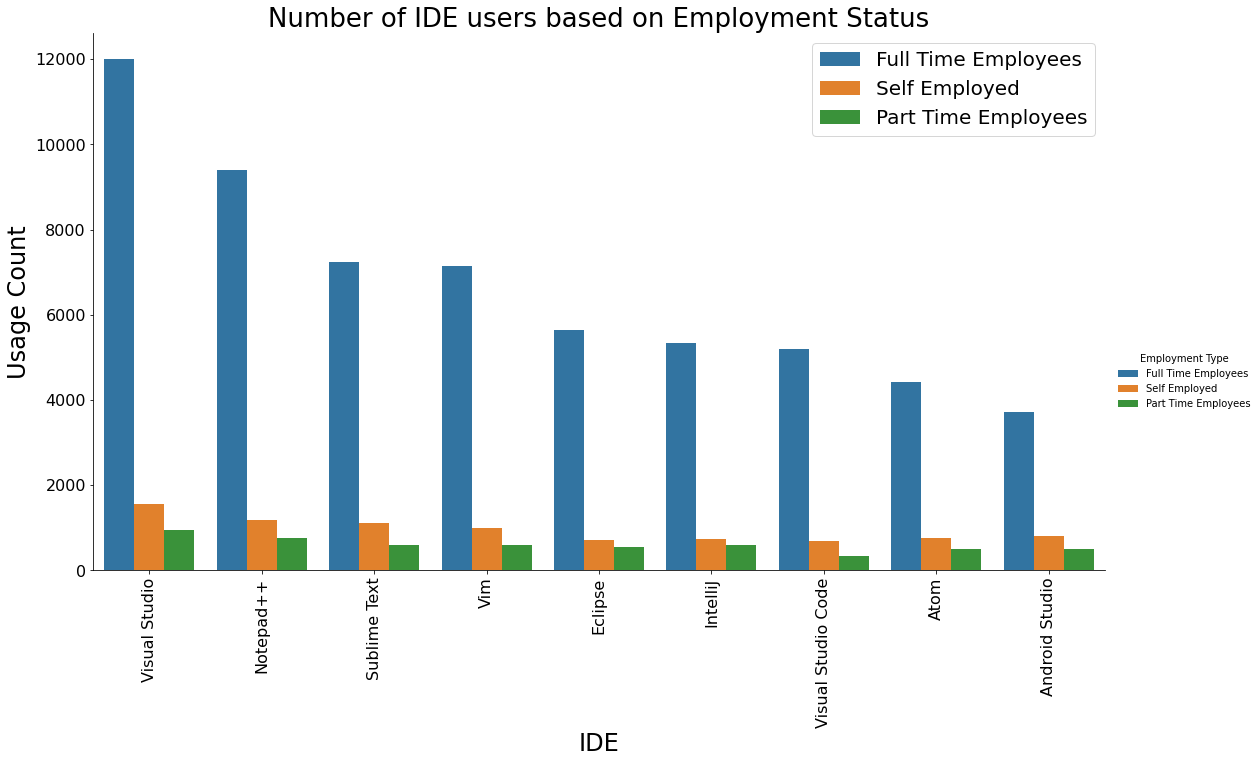

In [146]:
# Data Visualization
sns.catplot(x='IDE', y='Usage Count', hue='Employment Type', data=reshaped_df, kind='bar',height=8, aspect=15/8)

plt.xlabel('IDE',fontsize=24)
plt.ylabel('Usage Count',fontsize=24)
plt.legend(fontsize=20,loc='best')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)

plt.title('Number of IDE users based on Employment Status',fontsize=26)

plt.show()

## Conclusion

The data visualization is generated with the prepared data. From the above chart, we can see that be it a full-time employee, self-employed person, or part-time employee, developers preferred the Visual Studio IDE over the other IDEs.

# What kind of employee benefits do the developers prefer?

In [147]:
#Checking the question related to Important Benefits
list (survey_results_schema_df[survey_results_schema_df['Column']=='ImportantBenefits']['Question'])

['When it comes to compensation and benefits, other than base salary, which of the following are most important to you?']

In [148]:
##Let us see about various options available on the column important bnefits
ImportantBenefits_data = survey_results_public_df['ImportantBenefits'].value_counts().reset_index()
ImportantBenefits_data.columns = ['important_benefits','count']
ImportantBenefits_data.head()

,important_benefits,count
0,None of these,653
1,Retirement; Vacation/days off; Health benefits...,363
2,Vacation/days off; Equipment; Professional dev...,324
3,Vacation/days off; Health benefits; Equipment;...,305
4,Vacation/days off; Health benefits; Profession...,249


## Data Preparation

In [149]:
# Checking whether data is missing on the column "education_type"
ImportantBenefits_data['important_benefits'].isnull().mean()==0

True

#### The above cell denotes that there are no missing values on the column "important_benefits" and hence we can proceed with the next steps of the analysis

In [150]:
#Get the possible values of ImportantBenefits_data
possible_values_important_benefits = get_possible_values(ImportantBenefits_data,'important_benefits')
possible_values_important_benefits

['Retirement',
 'Equipment',
 'Remote options',
 'Meals',
 'Health benefits',
 'Stock options',
 'Long-term leave',
 'Professional development sponsorship',
 'Education sponsorship',
 'Expected work hours',
 'Private office',
 'Annual bonus',
 'None of these',
 'Charitable match',
 'Other',
 'Vacation/days off',
 'Child/elder care']

In [151]:
# Data Preparation
important_benefits_count_df = total_count(ImportantBenefits_data, 'important_benefits','count', possible_values_important_benefits)

#Let us see the percentage of people in each category
important_benefits_count_df['percentage'] = important_benefits_count_df['count']/important_benefits_count_df['count'].sum()


important_benefits_count_df

,important_benefits,count,percentage
15,Vacation/days off,17242,0.133200
2,Remote options,16121,0.124540
4,Health benefits,14253,0.110109
9,Expected work hours,13388,0.103427
1,Equipment,12126,0.093678
7,Professional development sponsorship,11434,0.088332
11,Annual bonus,9560,0.073854
0,Retirement,7959,0.061486
8,Education sponsorship,5303,0.040968
3,Meals,4593,0.035483


#### In the above cell, we can see that the data is prepared for the analysis. We have the required column "percentage" for our analysis

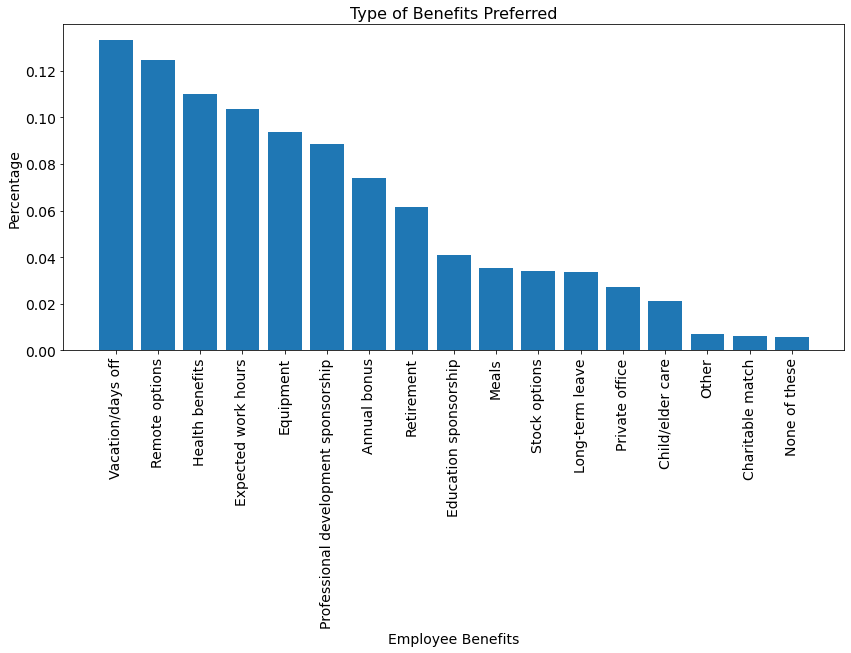

In [152]:
# Data Visualization
bar_plot(important_benefits_count_df,'important_benefits','percentage','Employee Benefits','Percentage','Type of Benefits Preferred')

## Conclusion

The data visualization is generated with the prepared data. From the above chart, we can see that the developers give almost equal priority to working from remote places as that of the Vacation benefits.